Chapter 07. 딥러닝을 시작       

        패션 럭키백 판매

# 07-1 인공신경망

In [1]:
#패션 MINIST
#-- 케라스 사용해 데이터 불러오기

import keras
(train_input, train_target) , (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

In [2]:
print(train_input.shape, train_target.shape)
#훈련데이터: 6만개 이미지, 각 이미지는 28*28
#타깃: 6만개의 원소, 1차원 배열

(60000, 28, 28) (60000,)


In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


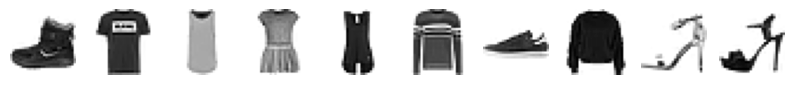

In [4]:
#어떤 이미지인지 직접 보기

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [5]:
print(train_target[:10])

[9 0 0 3 0 2 7 2 5 5]


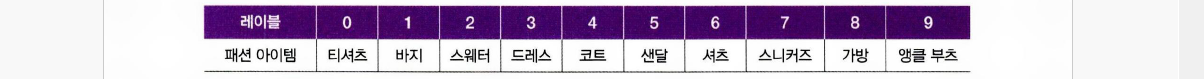

In [6]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


In [7]:
# 로지스틱 회귀로 패션 아이템 분류하기 p6
#--SGDClassifier, loss매개변수, 로지스틱손실함수 최소화,확률적 경사 하강법
#--표준화 전처리된 데이터 --기울기, 값의 범위가 다르면 안됨
#--양수 값 이미지 표준화(?) --> 0~255로 나누어 0~1 사이값으로 정규화
#--SGDClassifier --> 2차원입력X, 1차원 배열

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [8]:
print(train_scaled.shape)

(60000, 784)


In [9]:
#SGDClassifier 클래스와 cross_validate 함수를 사용해 이 데이터에서 교차 검증

# from sklearn.model_selection import cross_validate
# from sklearn.linear_model import SGDClassifier

# sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
# scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
# print(np.mean(scores['test_score']))

In [10]:
#max_iter = 10
# sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
# scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
# print(np.mean(scores['test_score']))

In [11]:
# #max_iter = 20
# sc = SGDClassifier(loss='log_loss', max_iter=20, random_state=42)
# scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
# print(np.mean(scores['test_score']))

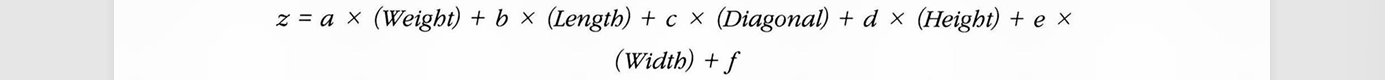
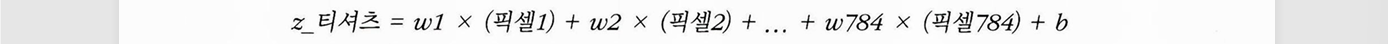

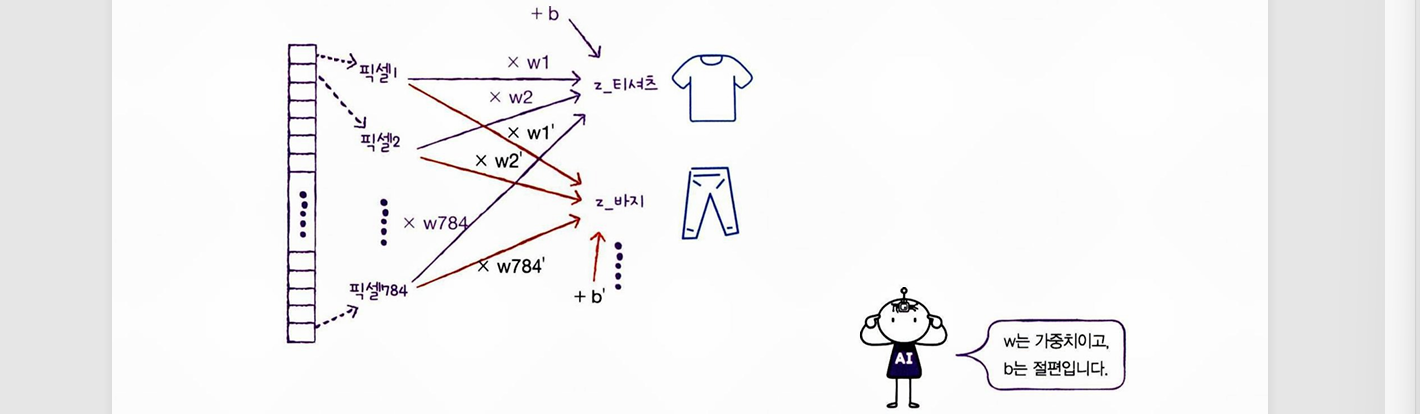
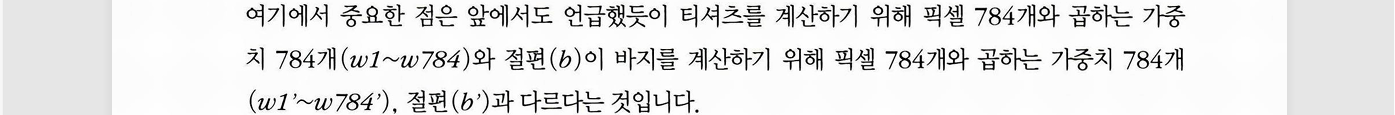
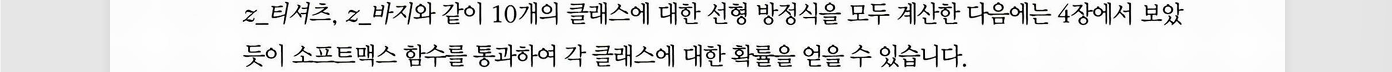




In [12]:
#🧠🧠인공신경망 ANN
#--가장 기본적인 인공 신경망은 확률적 경사 하강법을 사용하는 로지스틱 회귀와 같다.

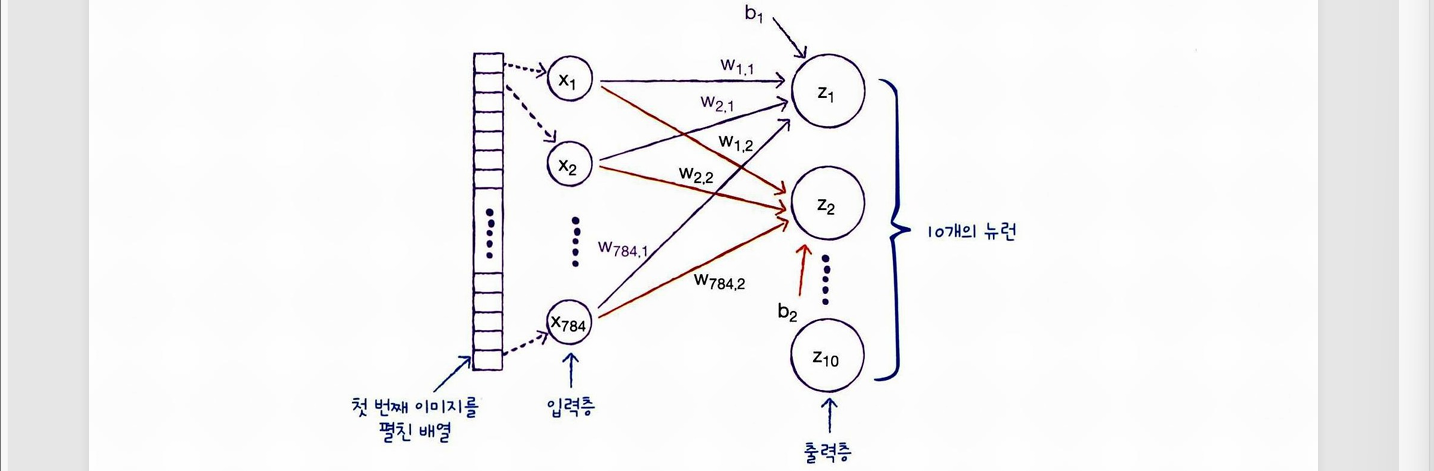

###### 클래스 10개, ~Z10 (출력층)          
###### z값 계산 단위 --뉴런, 유닛            
###### 픽셀 x1, x2... (입력층)     

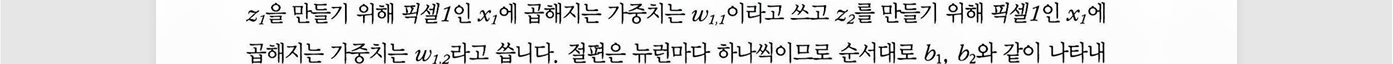

In [13]:
#텐서플로와 케라스(텐서플로의 고수준API)
#--딥러닝 라이브러리가 다른 머신러닝 라이브러리와다른 점 중 하나는 
#--그래픽 처리 장치인 GPU를사용하여 인공 신경망을 훈련한다는 것


import tensorflow as tf

케라스 라이브러리는 직접 GPU 연산 수행X     
대신 GPU 연산을 수행하는 다른 라이브러리를 백엔드로 사용        
케라스는 텐서플로, 파이토치, 잭스(JAX)를 백엔드로 사용      

In [14]:
import keras

In [15]:
#케라스가 사용중인 백엔드 확인
keras.config.backend()

'tensorflow'

In [16]:
import os
os.environ["KERAS_BACKEND"] = "torch"

### 인공 신경망으로 모델 만들기

In [17]:
# 딥러닝은 교차검증X, 검증세트 O
#--1. 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적
#--2. 교차 검증을수행하기에는 훈련 시애］ 너무 오래 걸리기 때문

from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

# 공부할 문제(train_scaled)와 정답(train_target) 80%, 
# 그리고 공부가 끝난 뒤 실력을 확인해볼 문제(val_scaled)와 정답(val_target) 20%로 
# 데이터를 나누겠다

In [18]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [19]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


입력층 만들기       
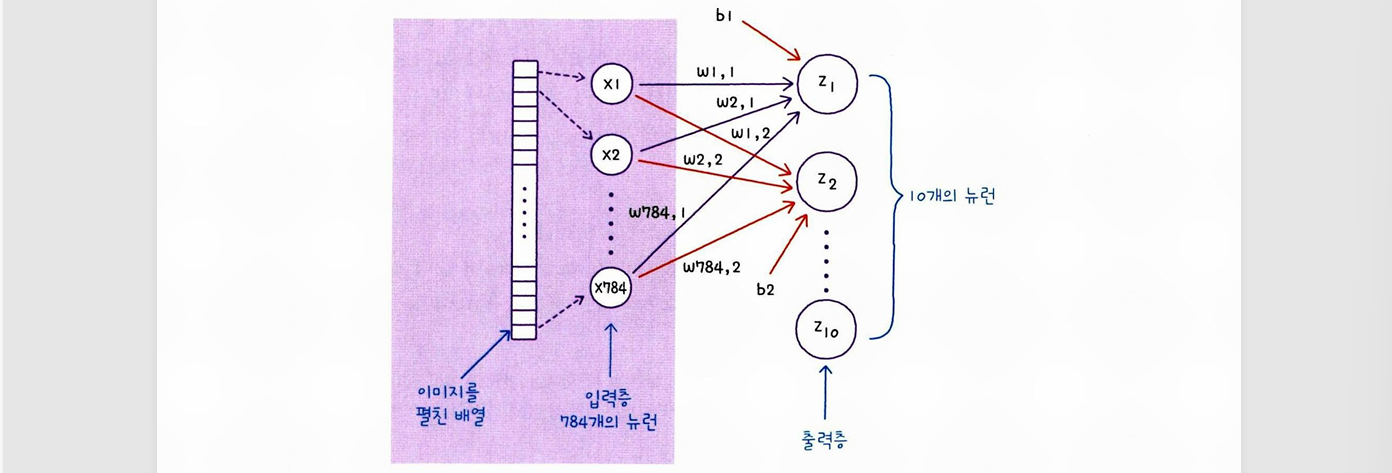

In [20]:
#입력층 정의 Input()함수 사용

inputs = keras.layers.Input(shape=(784,))
#shape 매개변수에는 꼭 튜플로 전달

출력층? 만들기
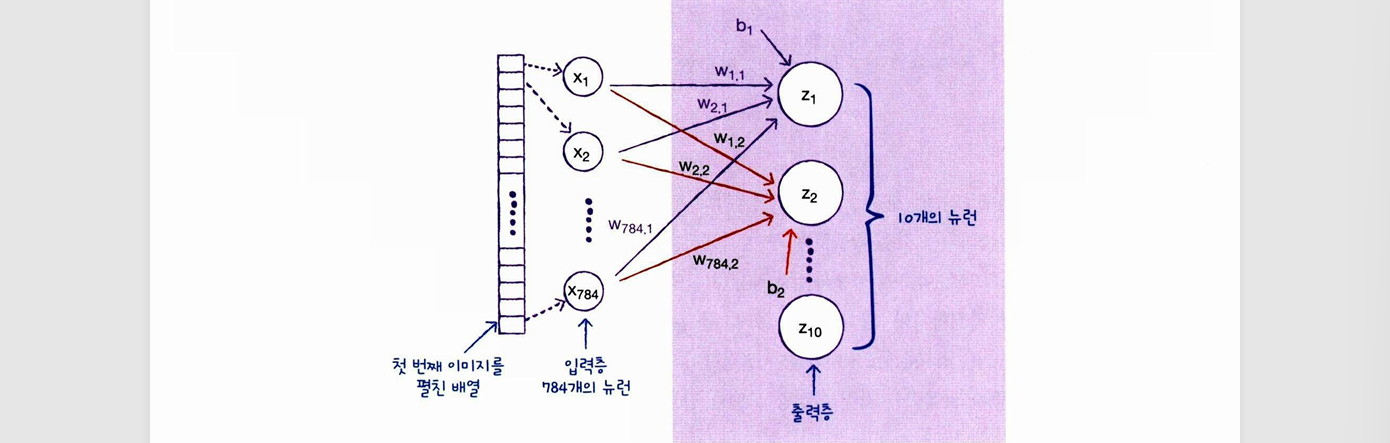

In [21]:
# Dense 클래스를 사용해 밀집층 만들기

dense = keras.layers.Dense(10, activation='softmax')
                    #뉴런개수, 뉴런의 출력에 적용할 함수()--확률!

In [22]:
# 입력층 객체와 밀집층의 객체를 리스트로 묶어 전달하여 신경망 모델 생성!

model = keras.Sequential([inputs, dense])

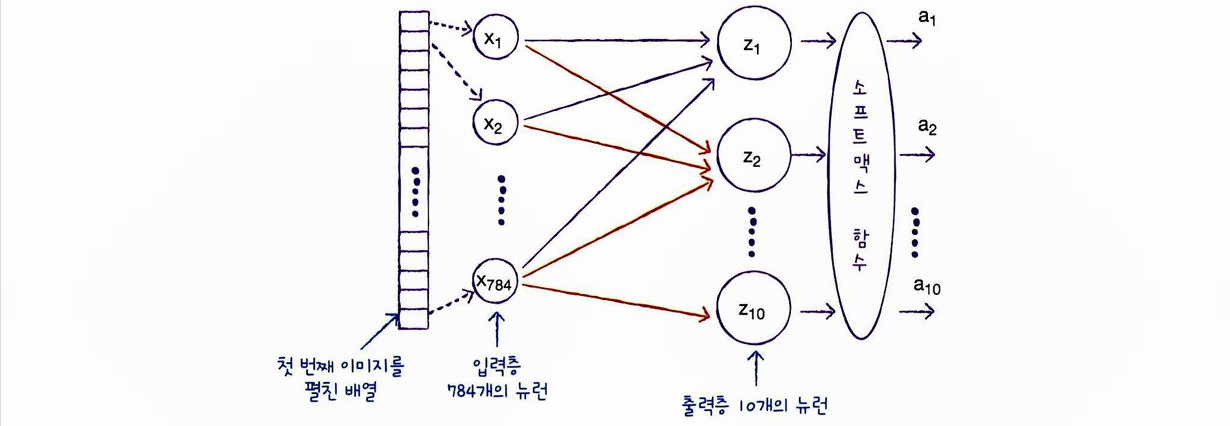
소프트맥스와 같이 뉴런의 선형 방정식 계산 결과에 적용되는 함수를 활성화 함수 activation function

In [23]:
# 인공 신경망으로 패션 아이템 분류
#--필수 설정 단계 model객체의 compile()메서드 수행
#--1.손실함수 (필수 지정)
#--2.원하는 측정값 지정

In [24]:
# • 이진 분류: loss = ‘binary_crossentropy’
# • 다중 분류: loss = ‘categorical_crossentropy’

model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#정수로된 타깃값을 사용해 크로스 엔트로피 손실을 계산하는 것:sparse_categorical_crossentropy
#빽빽한 배열 말고 정숫값 하나만 사용한다는 뜻:Sparse
#metrics 매개변수에 정확도 지표,꼭 리스트로 전달


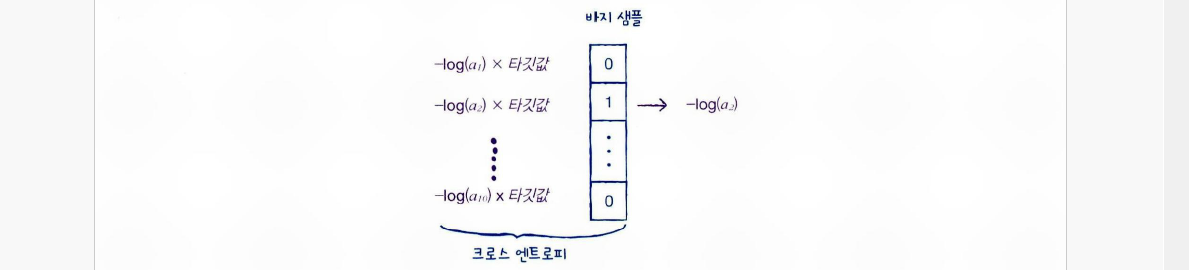
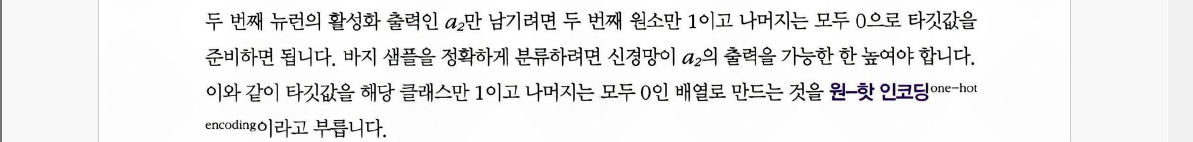

In [25]:
#모델 훈련
#에포크마다 걸린 시간과 loss, accuracy 출력
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 967us/step - accuracy: 0.7414 - loss: 0.7711
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8362 - loss: 0.4834
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8475 - loss: 0.4523
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8506 - loss: 0.4401
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8527 - loss: 0.4378


In [26]:
#따로 떼어 놓은 검증 세트 모델 성능 확인

model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8509 - loss: 0.4278


[0.436070054769516, 0.8505833148956299]

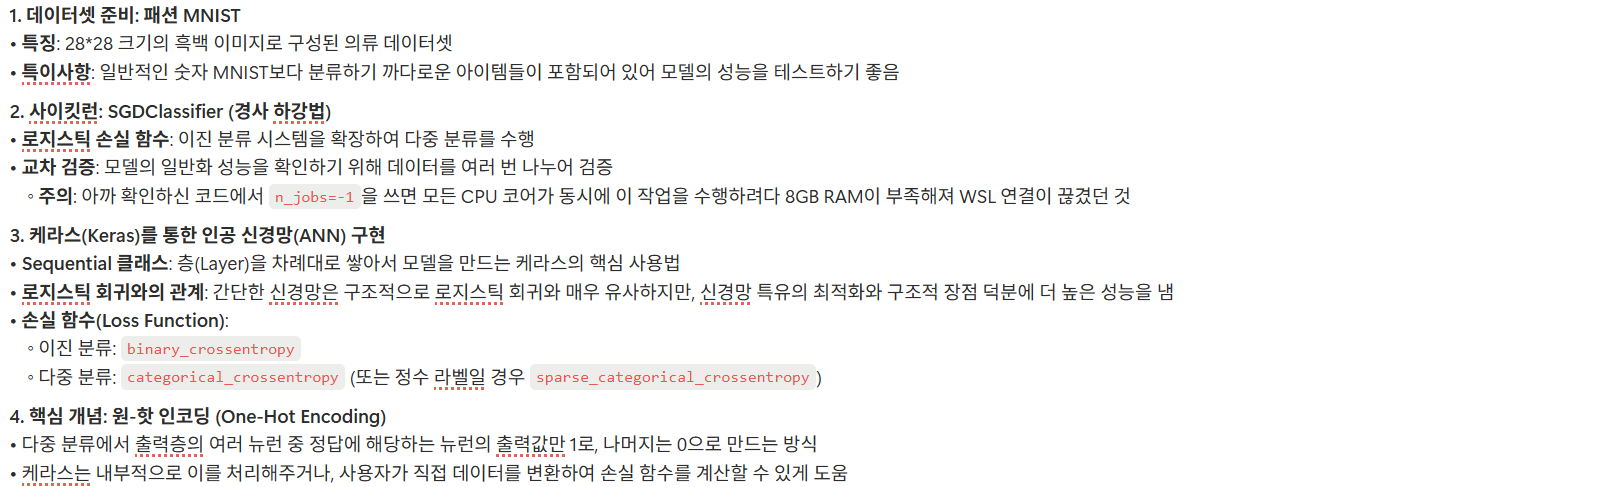

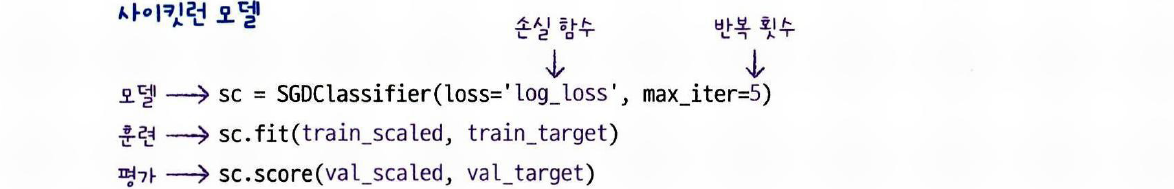
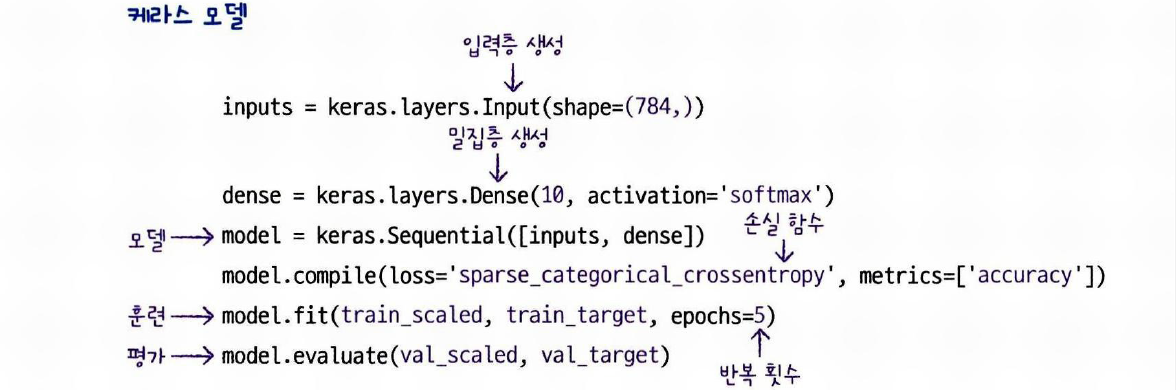
###### Input은 입력층을 구성하기 위한 함수. shape 매개변수에 입력의 크기를 튜플로 지정       
###### Dense는 신경망에서 가장 기본 층인 밀집층을 만드는 클래스        
###### Sequential은 케라스에서 신경망 모델을 만드는 클래스     
###### compile( )은 모델 객체를 만든 후 훈련하기 전, 사용할 손실 함수와 측정 지표 등을 지정      
###### fit( )은 모델을 훈련     
###### evaluate( )는 모델 성능을 평가       
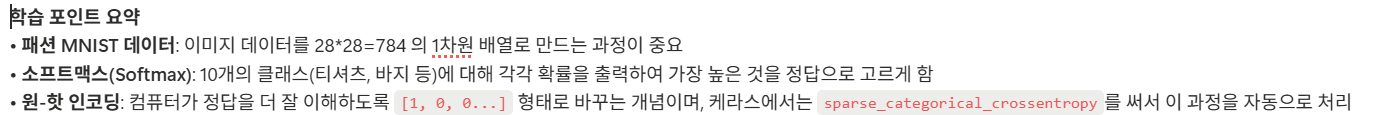

In [27]:
#패션 MNIST
# import keras
# (train_input, train_target) , (test_input, test_target) =\
#     keras.datasets.fashion_mnist.load_data()
# print(train_input.shape, train_target.shape)
# print(test_input.shape, test_target.shape)

# import matplotlib.pyplot as plt
# fig, axs = plt.subplots(1, 10, figsize=(10,10))
# for i in range(10):
#     axs[i].imshow(train_input[i], cmap='gray_r')
#     axs[i].axis('off')
# plt.show()
# print(train_target[:10])
# import numpy as np
# print(np.unique(train_target, return_counts=True))

In [28]:
#로지스틱 회귀로 패션 아이템 분류하기
# train_scaled = train_input / 255.0
# train_scaled = train_scaled.reshape(-1, 28*28)
# print(train_scaled.shape)
# from sklearn.model_selection import cross_validate
# from sklearn.linear_model import SGDCIassifier
# sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
# scores = cross_validate(sc, train_scaled, train_target, n_jobs=-l)
# print(np.mean(scores['test.score']))

In [29]:
#텐서플로와 케라스
# import tensorflow as tf

#인공 신경망으로 모델 만들기
# from sklearn.model_selection import train_test_split
# train_scaled, val_scaled, train_target, val_target = train_test_split(
#     train_scaled, train_target, test_size=0.2, random_state=42)
# print(train_scaled.shape, train_target.shape)
# print(val_scaled.shape, val_target.shape)
# inputs = keras.layers.Input(shape=(784,))
# dense = keras.layers.Dense(10, activation='softmax')
# model = keras.Sequential([inputs, dense])

#인공 신경망으로 패션 아이템 분류하기
# model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# print(train_target[:10])
# model.fit(train_scaled, train_target, epochs=5)
# model.evaluate(val_scaled, val_target)

# 07-2 심층 신경망

In [30]:
# 2개의 층,케라스 API를 사용해서 패션 MNIST 데이터셋 불러오기
import keras
(train_input, train_target) , (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

from sklearn.model_selection import train_test_split
#이미지픽셀값 0~255범위에서 0~1 사이 변환, 28+28크기 2차원 배여릉ㄹ 784크기 1차원 배열로
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

#훈련세트와 검증세트 나누기
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

##### 인공신경망 2개의 층 추가 (은닉층)
은닉층에는 활성화 함수 표시(신경망 층의 선형 방정식의 계산 값에 적용하는 함수)       
은닉층 활성화 함수는 출력층보다 그 종류가 자유로움
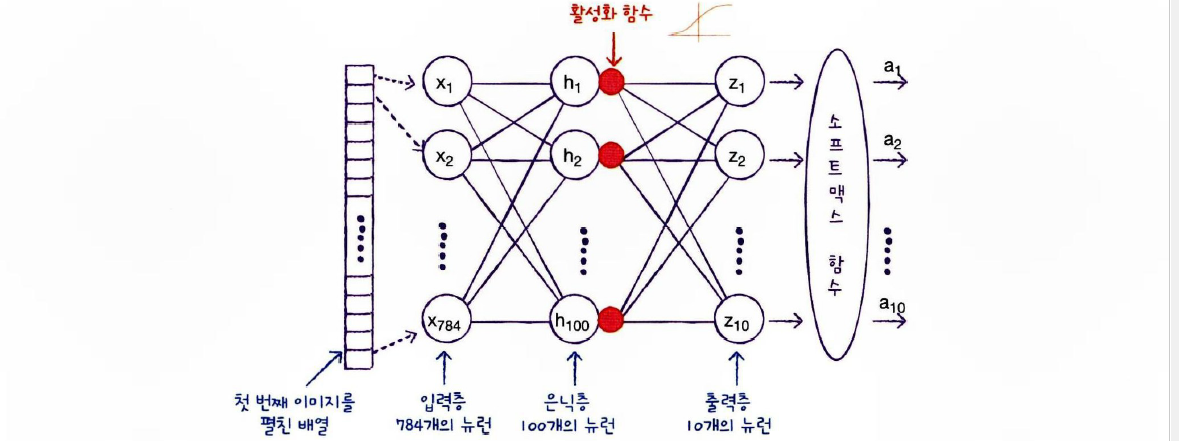      

은닉층에 왜 활성화 함수를 적용???       
은닉층에서 선형적인 산술 계산만 수행한다면 수행 역할이 없는 셈      
선형 계산을 적당하게 비선형적으로 비틀어 주어야 함. 그래야 다음 층의 계산과 단순히 합쳐지지 않고 나름의 역할을 할 수 있음

In [31]:
#시그모이드 활성화 함수를 사용한 은닉층과 
#소프트맥스 함수를 사용한 출력층을 케라스의 Dense 클래스 만들기

#------------------------------------[1]-----------------------------------------

inputs = keras.layers.Input(shape=(784,)) #입력층
densel = keras.layers.Dense(100, activation='sigmoid') #은닉층
dense2 = keras.layers.Dense(10, activation='softmax') #출력층

In [32]:
#심층 신경망 만들기

model = keras.Sequential([inputs, densel, dense2])

In [33]:
#케라스 모델의 정보
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
#☝️케라스의 기본 미니배치 크기는 32개. 이 값은 fit() 메서드에서 batch_size 매개변수로 바꿀 수 있다. 
#따라서 샘플 개수를 고정하지 않고 어떤 배치 크기에도 유연하게 대응할 수 있도록 None으로 설정

#✌️784개의 픽셀값이 은닉층을 통과하면서 100개의 특성으로 압축
#입력 픽셀 784개와 100개 + 100개의 절편 = 78,500

#👌100개의 은닉층 뉴런과 10개의 출력충 뉴런이 모두 연결되고 출력충의 뉴런마다 하나의 절편이 
#있기 때문에 총 1,010개의 모델 파라미터

#on-trainable params: 0 <--경사 하강법으로 훈련되지 않는 파라미터를 가진 층의 파라미터 개수

In [35]:
#층을 추가하는 다른 방법
#name 매개변수 모델 이름 지정

#------------------------------------[2]-----------------------------------------

model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(100, activation='sigmoid', name='은닉층'),
    keras.layers.Dense(10, activation='softmax', name='출력층')
    ], name='패션 MNIST 모델')


model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ 은닉층 (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 출력층 (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
#add() 메서드 활용
#------------------------------------[3]-----------------------------------------

model = keras.Sequential()
model.add(keras.layers.Input(shape=(784,)))
model.add(keras.layers.Dense(100, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
#모델 훈련

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7485 - loss: 0.7828
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8454 - loss: 0.4272
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8610 - loss: 0.3836
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8707 - loss: 0.3552
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8780 - loss: 0.3377


렐루(ReLU) 함수 -시그모이드 단점 대신!      
입력이 양수일 경우 활성화 함수가 없는 것처럼 그냥 입력을 통과시키고, 음수일 경우에는 0으로 만듦.
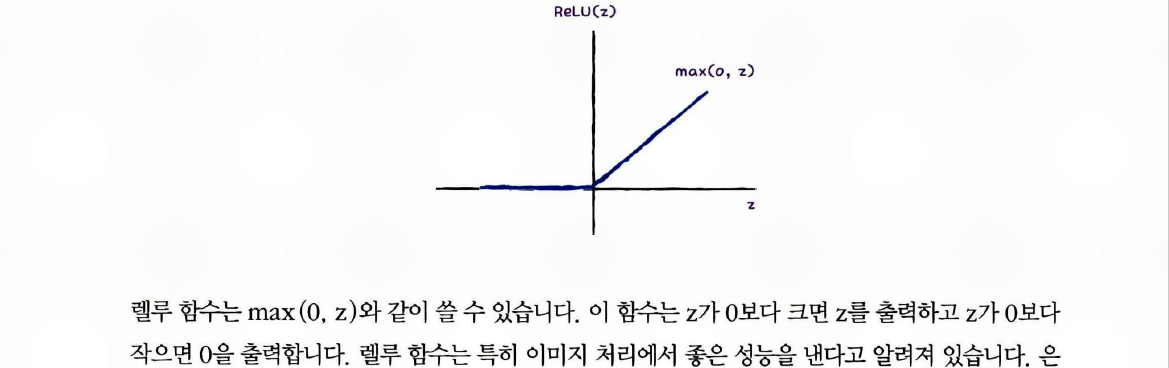



In [38]:
#Flatten 클래스 : 1차원으로 펼치도록 (입력층 바로 뒤에 추가)

model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
import keras
(train_input, train_target) , (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
# train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [40]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7594 - loss: 0.6919
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8538 - loss: 0.4070
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8727 - loss: 0.3510
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8806 - loss: 0.3327
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8862 - loss: 0.3185


In [41]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8743 - loss: 0.3694


[0.37416788935661316, 0.8727499842643738]

In [42]:
#옵티마이저 : 신경망의 가중치와 절편을 학습하기 위한 알고리즘 또는 방법!
#하이퍼파라미터(은닝층개수, 은닉층의 뉴런개수, 활성화 함수, 층의 종류, batch_size, epchs 등)

#기본적인 옵티마이저는 확률적 경사 하강법인 SGD
#optimizer 매개변수를 ‘sgd’로 지정
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [43]:
sgd = keras.optimizers.SGD()
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [44]:
#SGD 클래스 학습률 기본값 0.01에서 0.1로 지정

sgd = keras.optimizers.SGD(learning_rate=0.1)

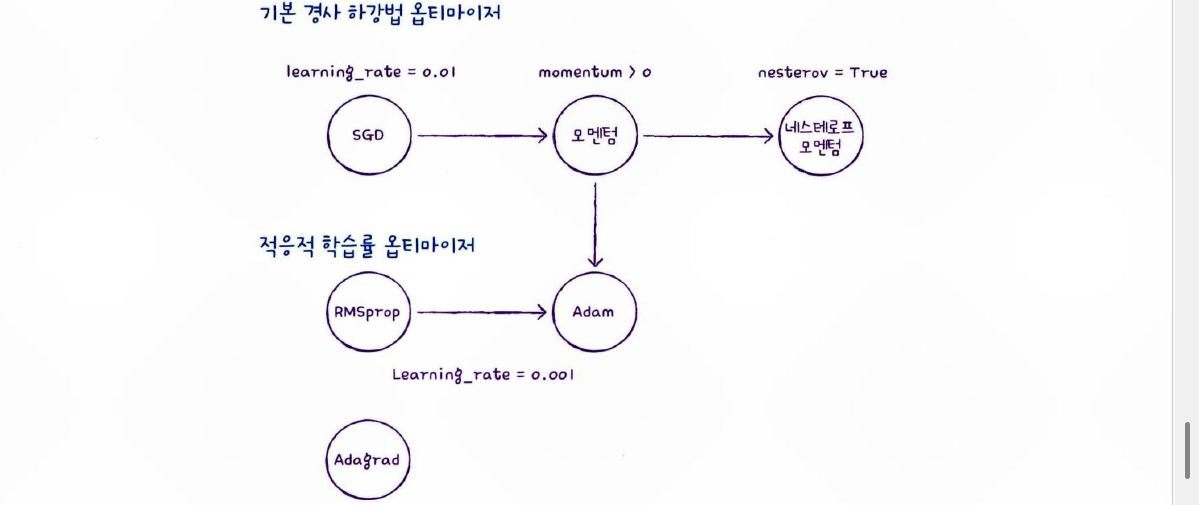

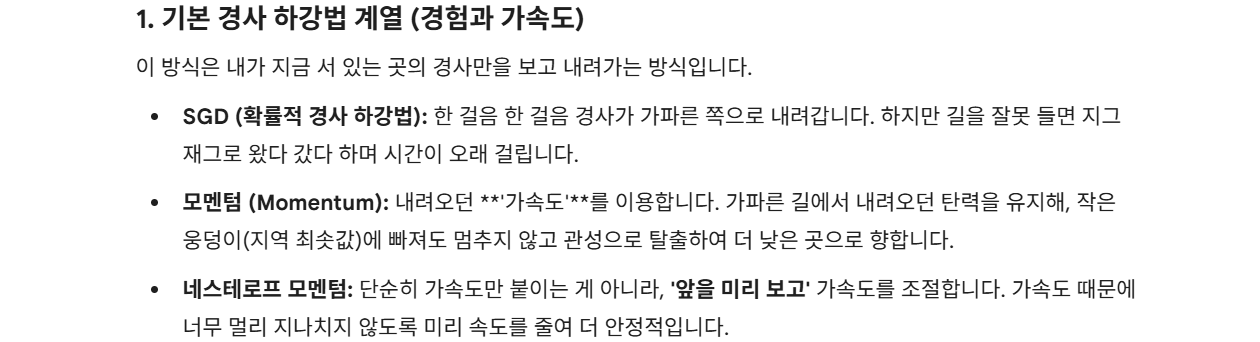
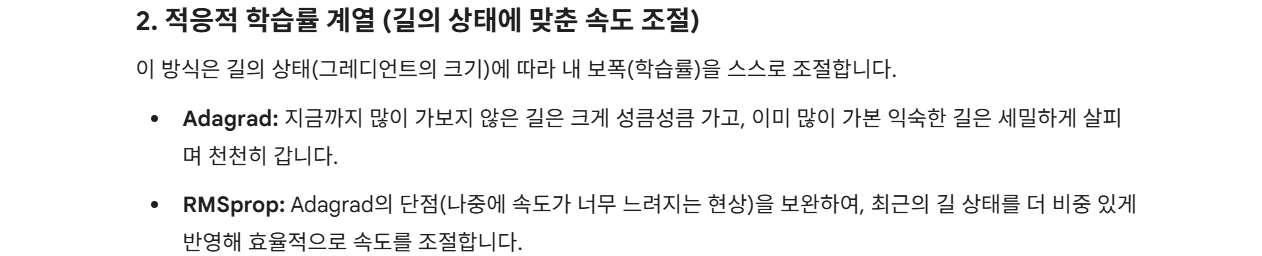
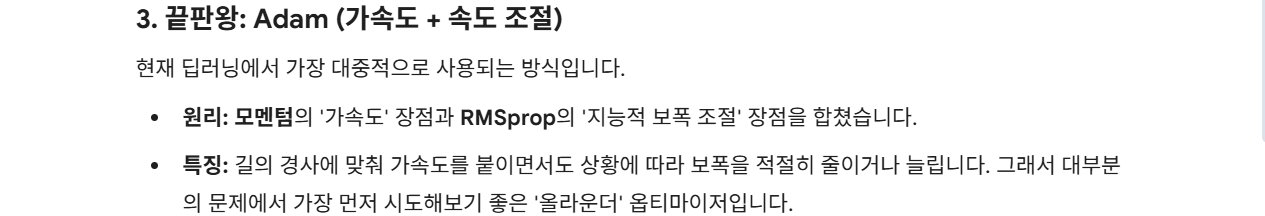

In [45]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)
#이전의 가속도를 90% 유지하면서(momentum=0.9), 다음 이동할 위치의 경사를 미리 확인하여 
#지나침을 방지하는(nesterov=True) 지능형 가속 경사 하강법을 사용하겠다

In [46]:
#Adam 클래스의 매개변수 기본값 사용하여 MNIST 훈련

model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [47]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7655 - loss: 0.6839
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8532 - loss: 0.4123
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8684 - loss: 0.3619
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8782 - loss: 0.3305
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8855 - loss: 0.3104


In [48]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8732 - loss: 0.3542


[0.3582907021045685, 0.874916672706604]

In [49]:
#--2개의 층
# import keras
# (train_input, train_target) , (test_input, test_target) =\
#     keras.datasets.fashion_mnist.load_data()

# from sklearn.model_selection import train_test_split
# train_scaled = train_input / 255.0
# train_scaled = train_scaled.reshape(-1, 28*28)

# train_scaled, val_scaled, train_target, val_target = train_test_split(
#     train_scaled, train_target, test_size=0.2, random_state=42)

# inputs = keras.layers.Input(shape=(784,)) #입력층
# densel = keras.layers.Dense(100, activation='sigmoid') #은닉층
# dense2 = keras.layers.Dense(10, activation='softmax') #출력층

#--심층 신경망 만들기
# model = keras.Sequential([inputs, densel, dense2])
# model.summary()

#--층을 추가하는 다른 방법(2)
# model = keras.Sequential([
#     keras.layers.Input(shape=(784,)),
#     keras.layers.Dense(100, activation='sigmoid', name='은닉층'),
#     keras.layers.Dense(10, activation='softmax', name='출력층')
#     ], name='패션 MNIST 모델')

# model.summary()

#--층을 추가하는 다른 방법(3)
# model = keras.Sequential()
# model.add(keras.layers.Input(shape=(784,)))
# model.add(keras.layers.Dense(100, activation='sigmoid'))
# model.add(keras.layers.Dense(10, activation='softmax'))

# model.summary()

# model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.fit(train_scaled, train_target, epochs=5)

In [50]:
#--렐루 함수
# model = keras.Sequential()
# model.add(keras.layers.Input(shape=(28,28)))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

# model.summary()

# (train_input, train_target) , (test_input, test_target) =\
#     keras.datasets.fashion_mnist.load_data()
# train_scaled = train_input / 255.0
# # train_scaled = train_scaled.reshape(-1, 28*28)
# train_scaled, val_scaled, train_target, val_target = train_test_split(
#     train_scaled, train_target, test_size=0.2, random_state=42)
# model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.fit(train_scaled, train_target, epochs=5)
# model.evaluate(val_scaled, val_target)

In [51]:
#--옵티마이저
# model = keras.Sequential()
# model.add(keras.layers.Input(shape=(28,28)))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# model.fit(train_scaled, train_target, epochs=5)
# model.evaluate(val_scaled, val_target)

## 07-2 파이토치 버전

In [52]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [53]:
from torchvision.datasets import FashionMNIST

In [54]:
#root매개변수=다운로드된데이터 저장될 위치('.'지정하면 현재 폴더에 클래스이름과 동일한 폴더생성되고 그 안에 저장됨)
#train매개변수 True=훈련데이터 다운로드, False면 테스트데이터 다운로드
#download매개변수 True=원격에 저장된 데이터를 로컬에 다운로드 후 저장
fm_train = FashionMNIST(root='.', train=True, download=True)
fm_test = FashionMNIST(root='.', train=False, download=True)

In [55]:
#속성확인, 텐서는 파이토치의 기본 데이터 구조
type(fm_train.data)

torch.Tensor

In [56]:
#훈련 및 데이터 크기 확인
print(fm_train.data.shape, fm_test.data.shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


In [57]:
#타킷 크기 확인
print(fm_train.targets.shape, fm_test.targets.shape)

torch.Size([60000]) torch.Size([10000])


In [58]:
#모델훈련에 사용할 입력과 타킷 데이터 준비
train_input = fm_train.data
train_target = fm_train.targets

In [59]:
#정규화
train_scaled = train_input / 255.0

In [60]:
#훈련세트를 다시 훈련세트와 검증세트로 나눔
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [61]:
#훈련세트와 검증세트의 크기 확인
print(train_scaled.shape, val_scaled.shape)

torch.Size([48000, 28, 28]) torch.Size([12000, 28, 28])


In [62]:
#Sequential로 모델 생성

import torch.nn as nn

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,100),#첫번째 Linear층
    nn.ReLU(),
    nn.Linear(100,10)#두번째 Linear층
)

# 1.파이토치에서는 모델의입력크기를 사전에지정할필요x. 케라스의Input()과같은 별도의입력 정의함수x
# 2.케라스의Dense층과 동일한역할을 하는것이 파이토치의 Linear 층임
# Linear 층을사용할 때는 입력크기와 출력크기(뉴런 개수)를 매개변수로 전달
# 3.파이토치에서는 활성화 함수를 별도의 층으로 추가해야 함. 렐루함수의 경우ReLU 층을 사용
# 4.출력층에 해당하는 두번째 Linear층 다음에는 활성화 함수가 없음. 
# 케라스에서는 다중분류문제를 해결하기위해 마지막층에 소프트맥스함수를 포함했지만, 파이토치에서는생략

In [63]:
# pip install torchinfo

In [64]:
#한 번에 32개의 샘플이 모델에 입력되는 형태

from torchinfo import summary
summary(model, input_size=(32,28,28))


Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [32, 10]                  --
├─Flatten: 1-1                           [32, 784]                 --
├─Linear: 1-2                            [32, 100]                 78,500
├─ReLU: 1-3                              [32, 100]                 --
├─Linear: 1-4                            [32, 10]                  1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 2.54
Input size (MB): 0.10
Forward/backward pass size (MB): 0.03
Params size (MB): 0.32
Estimated Total Size (MB): 0.45

In [65]:
#파이토치 디바이스 객체와 to() 메서드를 사용해 GPU 사용 여부를 설정
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=100, bias=True)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=10, bias=True)
)

In [66]:
#손실 함수와 옵티마이저를 준비

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
#CrossEntropyLoss 클래스에 소프트맥스 함수가 이미 포함--소프트맥스 활성화 함수를 추가안함
#--소프트맥스함수계산과 크로스엔트로피계산을 하나의연산으로 합쳐 효율적으로 계산할 수 있도록 설계


In [67]:
epochs = 5
batches = int(len(train_scaled)/32)
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for i in range(batches):
        inputs = train_scaled[i*32:(i+1)*32].to(device)
        targets = train_target[i*32:(i+1)*32].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    print(f"에포크:{epoch+1}, 손실:{train_loss/batches:.4f}")

에포크:1, 손실:0.5498
에포크:2, 손실:0.4040
에포크:3, 손실:0.3632
에포크:4, 손실:0.3358
에포크:5, 손실:0.3147


In [68]:
#검증세트를 사용해 모델의 성능 평가

model.eval()
with torch.no_grad(): #그레이디언트를 계산하지 않는다.메모리와 계산량을 줄여줌
    val_scaled = val_scaled.to(device)
    val_target = val_target.to(device)
    outputs = model(val_scaled) #검증세트의 샘플12000개에 대해 타깃클래스마다 출력
    predicts = torch.argmax(outputs, 1)#두번째축을따라 가장 큰 값의 인덱스를 predicts에저장
    corrects = (predicts == val_target).sum().item()#predicts와 val_target을 비교후 올바르게 예측한 개수를 corrects 변수에 저장
accuracy = corrects / len(val_target)
print(f"검증 정확도: {accuracy: .4f}")

검증 정확도:  0.8732


# 07-3 신경망 모델 훈련

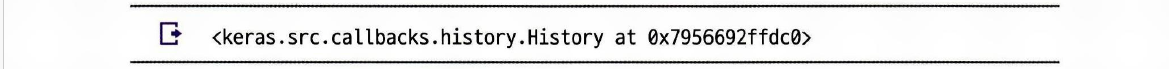

In [69]:
#손실 곡선 

# 케라스의 fit() 메서드는 History 클래스 객체를 반환한다.
# History 객체에는 훈련 과정에서 계산한 지표,즉 손실과 정확도 값이 저장되어있다.

# MNIST 데이터셋을 적재하고 훈련 세트와 검증 세트로 나눔

import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [70]:
#모델을 만드는 간단한 함수 정의

def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28,28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [71]:
model = model_fn()
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
#fit()메서드 결과를 history 변수에 담기

model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_scaled, train_target, epochs=5, verbose=2)

# verbose 기본값은 1: 에포크마다 진행 막대와 함께 손실등의 지표가 출력
# 2로 바꾸면 진행 막대를 빼고 출력
# verbose 매개변수를 0으로 지정하여 훈련 과정을 나타나지 않음

Epoch 1/5
1500/1500 - 3s - 2ms/step - accuracy: 0.8134 - loss: 0.5289
Epoch 2/5
1500/1500 - 2s - 2ms/step - accuracy: 0.8593 - loss: 0.3914
Epoch 3/5
1500/1500 - 2s - 2ms/step - accuracy: 0.8723 - loss: 0.3540
Epoch 4/5
1500/1500 - 2s - 1ms/step - accuracy: 0.8796 - loss: 0.3334
Epoch 5/5
1500/1500 - 2s - 2ms/step - accuracy: 0.8863 - loss: 0.3168


In [73]:
#history 딕셔너리 값 확인(정확도와 손실 포함)
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


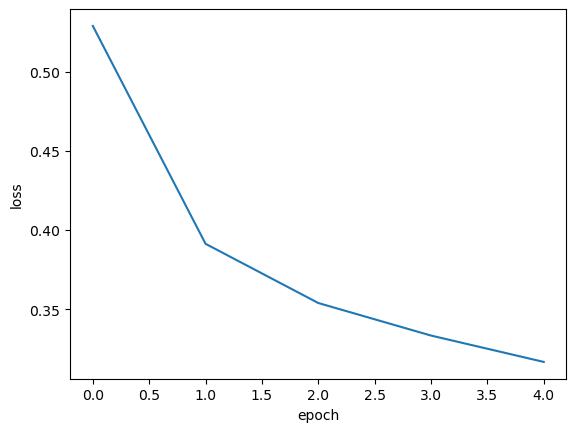

In [74]:
#history 속성의 손실과 정확도는 에포크마다 계산된 값이 순서대로 나열된 단순한 리스트로 그래프그리기 가능

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

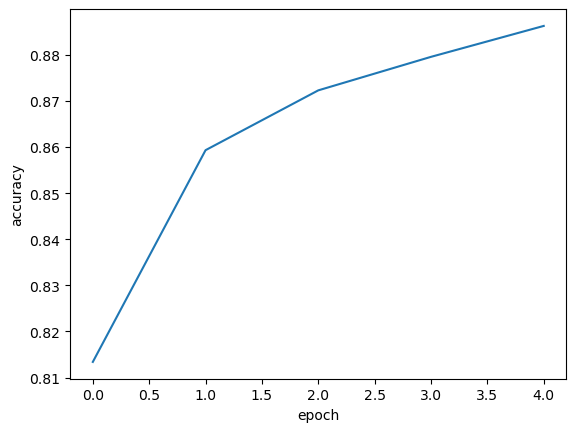

In [75]:
#정확도 출력

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

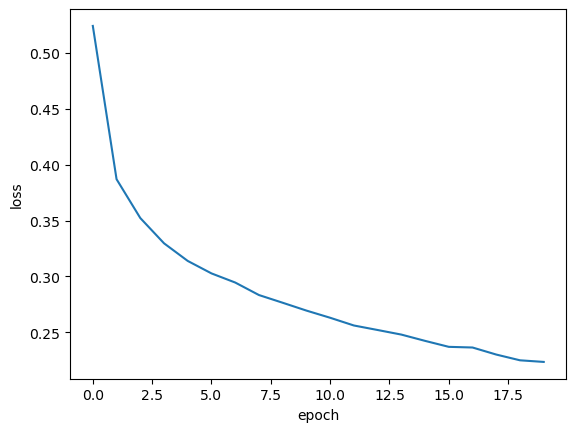

In [76]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [77]:
#검증 손실 p71
#에포크에 따른 과대적합과 과소적합을 파악하려면 훈련 세트에 대한 점수뿐만 아니라 검증 세트에 대한 점수도 필요
#손실을 사용한 과대/과소적합
#모델이 잘 훈련되었는지 판단하려면 정확도보다는 손실 함수의 값을 확인
#에포크마다 검증 손실을 계산하기 위해 케라스 모델의 fit() 메서드에 검증 데이터를 전달
#validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달

In [78]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [79]:
#반환된 history 딕셔너리 키 확인
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


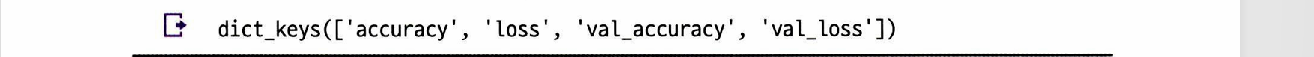  
검증 세트에 대한 손실은 'val_loss'에, 정확도는 'val_accuracy'에 들어있다.       

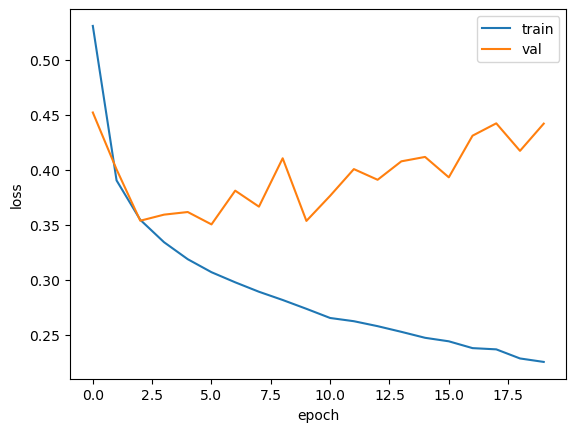

In [80]:
#과대/과소 적합 문제를 조사하기 위한 훈련 손실과 검증 손실 그래프 비교

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()


훈련 손실은 꾸준히 감소하기 때문에 전형적인 과대적합 모델이 만들어짐        
검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라       
검증 세트에 대한 정확도도 증가

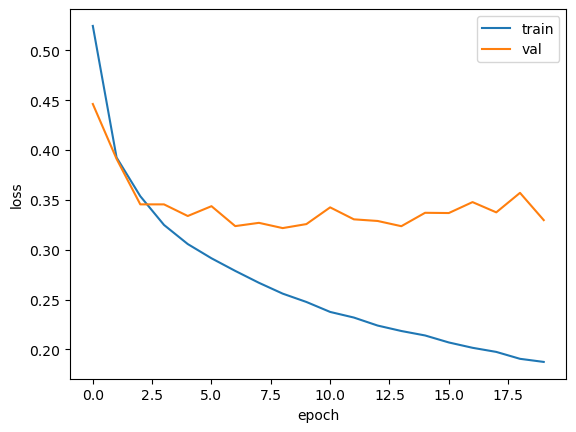

In [81]:
#옵티마이저 하이퍼파라미터 조정해서 과대적합 완화시켜보기

model = model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [82]:
#드롭아웃 dropout
#--일부 뉴런을 랜덤하게 꺼서 과대적합 예방

model = model_fn(keras.layers.Dropout(0.3))
model.summary()

#드롭아웃 층은 훈련되는 모델 파라미터가 없다.
#입력과 출력의 크기가 같고, 일부 뉴런의 출력을 0으로 만듦

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

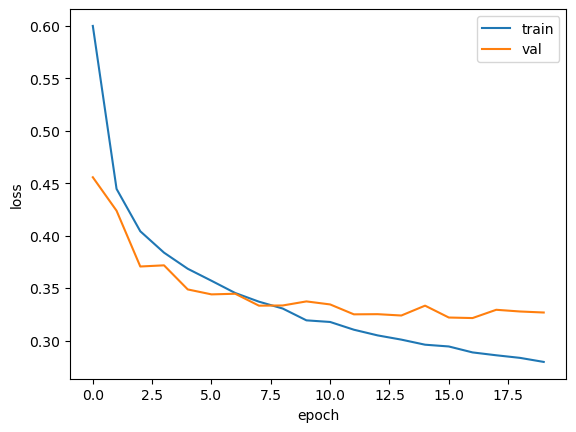

In [83]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [84]:
#모델 저장과 복원
#에포크 횟수 11

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=11, verbose=0,
                    validation_data=(val_scaled, val_target))

In [85]:
model.save('model-whole.keras')

In [86]:
#파라미터를 HDF5 포맷으로 저장, 파일의 확장자 weights.h5로 끝나야 함
model.save_weights('model.weights.h5')

In [87]:
!ls -al model*

'ls'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [88]:
#훈련하지 않은 새로운 모델만들고
#model-weights.h5 파일에서 훈련된 모델 파라미터 읽어 사용
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')

In [89]:
import numpy as np
#케라스의 predict()메서드는 샘플마다 10개의 클래스에 대한 확률 반환함
#10개 확률 중 가장 큰 값의 인덱스를 골라 타깃 레이블과 비교하여 정확도 계산(argmax)
#axis=데이터가 들어있는 상자(배열) 어느방향으로 훑을지 결정
#axis=1 (혹은 -1): 가로 방향 (행별로 계산)
#axis=0: 세로 방향 (열별로 계산)

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))
            #예측값         #실제정답

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step
0.8804166666666666


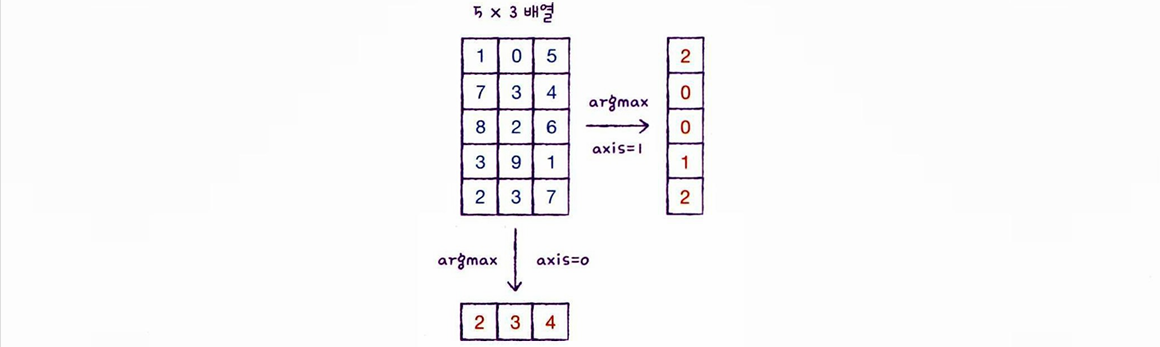
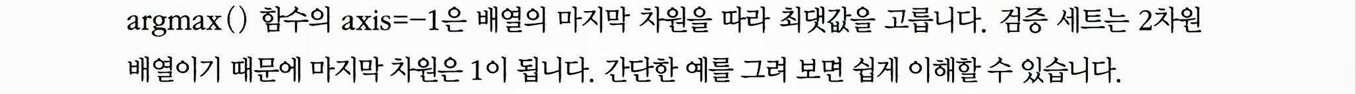
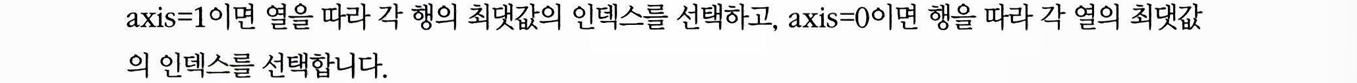
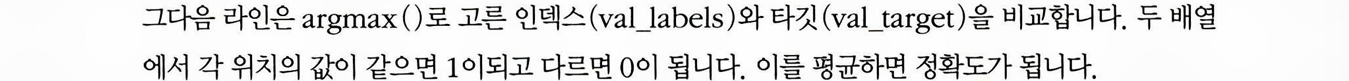

In [90]:
# 두 번째는 아예 model-whole.keras 파일에서 새로운 모델을 만들어 바로 사용
model = keras.models.load_model('model-whole.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8825 - loss: 0.3169


[0.32226112484931946, 0.8804166913032532]

In [91]:
#콜백 collback
#훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
#ModelCheckpoint -- 에포크마다 모델 저장
#save_best_only=True 가장 낮은 검증 손실을 만드는데 모델 저장

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

#1.model_fn() 함수 모델 생성
#2.compile()메서드 호출
#3.Modelcheckpoint 클래스의 객체 checkpoint_cb를 만든 후 
#4.fit() 메서드의 callbacks 매개변수에 리스트로 감싸서 전달
#5.best-model.h5에 최상의 검증 점수를 낸 모델 저장
#6.load_model()함수로 다시 읽어 예측 수행


In [92]:
model = keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8849 - loss: 0.3148


[0.316744863986969, 0.8856666684150696]

In [93]:
#케라스에는 조기 종료를 위한 EarlyStopping 콜백을 제공
#patience=2로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])

In [94]:
#몇 번째 에포크에서 훈련이 중지되었는지 확인
print(early_stopping_cb.stopped_epoch)

#숫자10은 열한번째 에포크에서 훈련이 중지됨을 의미. 
# patience를 2로 지정했기에 최상의 모델은 9번째 에포크

9


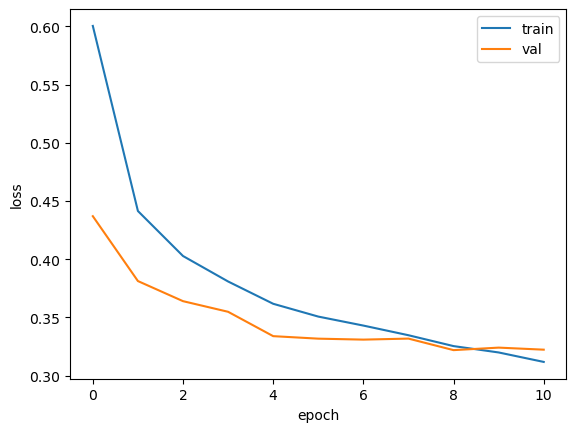

In [95]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [96]:
#조기 종료로 얻은 모델을 사용해 검증 세트에 대한 성능 확인
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8852 - loss: 0.3291


[0.33031827211380005, 0.8817499876022339]

In [97]:
###손실곡선
# import keras
# from sklearn.model_selection import train_test_split
# (train_input, train_target), (test_input, test_target) =\
#     keras.datasets.fashion_mnist.load_data()
# train_scaled = train_input / 255.0
# train_scaled, val_scaled, train_target, val_target = train_test_split(
#     train_scaled, train_target, test_size=0.2, random_state=42)

# def model_fn(a_layer=None):
#     model = keras.Sequential()
#     model.add(keras.layers.Input(shape=(28,28)))
#     model.add(keras.layers.Flatten())
#     model.add(keras.layers.Dense(100, activation='relu'))
#     if a_layer:
#         model.add(a_layer)
#     model.add(keras.layers.Dense(10, activation='softmax'))
#     return model

# model = model_fn()
# model.summary()
# model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# history=model.fit(train_scaled, train_target, epochs=5, verbose=0)

# print(history.history.keys())

# import matplotlib.pyplot as plt

# plt.plot(history.history['loss'])
# plt.xlabel('epoch')
# plt.ylabel('loss')
# plt.show()

# plt.plot(history.history['accuracy'])
# plt.xlabel('epoch')
# plt.ylabel('accuracy')
# plt.show()

# model = model_fn()
# model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# history=model.fit(train_scaled, train_target, epochs=20, verbose=0)
# plt.plot(history.history['loss'])
# plt.xlabel('epoch')
# plt.ylabel('loss')
# plt.show()

In [98]:
###검증 손실
# model = model_fn()
# model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
#                    🍇validation_data=(val_scaled, val_target))
# print(history.history.keys())

# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='val')
# plt.xlabel('epoch')
# plt.ylabel('loss')
# plt.legend()
# plt.show()

# model = model_fn()
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
#                     validation_data=(val_scaled, val_target))
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='val')
# plt.xlabel('epoch')
# plt.ylabel('loss')
# plt.legend()
# plt.show()

In [99]:
###드롭아웃 dropout
#---은닉층에 있는 뉴런의 출력을 랜덤하게꺼내 과대적합 예방
# model = model_fn(keras.layers.Dropout(0.3))🍇
# model.summary()

# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
#                     validation_data=(val_scaled, val_target))
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='val')
# plt.xlabel('epoch')
# plt.ylabel('loss')
# plt.legend()
# plt.show()

In [100]:
###모델 저장과 복원
# model = model_fn(keras.layers.Dropout(0.3))
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
#                     validation_data=(val_scaled, val_target))
# model.save('model-whole.keras')
# model.save_weights('model.weights.h5')🍇
# !ls -al model*

# import numpy as np
# val_labels = np.argmax(model.predict(val_scaled), axis=-1)
# print(np.mean(val_labels == val_target))

# model = keras.models.load_model('model-whole.keras')
# model.evaluate(val_scaled, val_target)

In [101]:
###콜백
#--검증점수가 더 이상 향상되지 않으면 일찍 종료
# model = model_fn(keras.layers.Dropout(0.3))
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
# model.fit(train_scaled, train_target, epochs=20, verbose=0,
#           validation_data=(val_scaled, val_target),
#           callbacks=[checkpoint_cb])

# model = keras.models.load_model('best-model.keras')
# model.evaluate(val_scaled, val_target)

# model = model_fn(keras.layers.Dropout(0.3))
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
#🍇early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
# model.fit(train_scaled, train_target, epochs=20, verbose=0,
#           validation_data=(val_scaled, val_target),
#           callbacks=[checkpoint_cb, early_stopping_cb])
# print(early_stopping_cb.stopped_epoch)

# plt.plot(history.history['loss'],label='train')
# plt.plot(history.history['val_loss'],label='val')
# plt.xlabel('epoch')
# plt.ylabel('loss')
# plt.legend()
# plt.show()

# model.evaluate(val_scaled, val_target)

## 07-3 파이토치로 신경망 모델 훈련

In [102]:
# MNIST 데이터 로드, 훈련세트와 검증세트 준비
from torchvision.datasets import FashionMNIST

fm_train = FashionMNIST(root='.', train=True, download=True)
fm_test = FashionMNIST(root='.', train=False, download=True)

train_input = fm_train.data
train_target = fm_train.targets
train_scaled = train_input / 255.0

In [103]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [104]:
import torch.nn as nn

#두 개의 밀집층 사이에 드롭아웃 추가, 드롭아웃 비율 0.3, 만든 모델 GPU에 적재
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,100),
    nn.ReLU(),
    nn.Dropout(0,3),
    nn.Linear(100,10)
    )

import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=100, bias=True)
  (2): ReLU()
  (3): Dropout(p=0, inplace=3)
  (4): Linear(in_features=100, out_features=10, bias=True)
)

In [105]:
import torch.optim as optim

#손실함수 및 옵티마이저 준비
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [106]:
# train_hist = []
# val_hist = []
# patience = 2
# best_loss = -1
# early_stopping_counter = 0

# epochs = 20
# batches = int(len(train_scaled)/32)
# for epoch in range(epochs):
#     # --- Training Phase ---
#     model.train()
#     train_loss = 0    
#     for i in range(batches):
#         inputs = train_scaled[i*32:(i+1)*32].to(device)
#         targets = train_target[i*32:(i+1)*32].to(device) # 변수명 수정
        
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, targets)
#         loss.backward()
#         optimizer.step()
        
#         train_loss += loss.item()
#         #검증세트에 대한 손실을 계산하는 코드 추가
#     model.eval()
#     val_loss = 0
#     with torch.no_grad():
#         val_scaled = val_scaled.to(device)
#         val_target = val_target.to(device)
#         outputs = model(val_scaled)
#         loss = criterion(outputs, val_target)
#         val_loss = loss.item()
#     #train_hist, vla_hist 리스트에 훈련손실과 검증 손실 추가하고 두 값 출력
#     train_hist.append(train_loss/batches)
#     val_hist.append(val_loss)
#     print(f"에포크:{epoch+1},",
#           f"훈련 손실:{train_loss/batches:.4f}, 검증손실:{val_loss:.4f}")
#     if best_loss == -1 or val_loss < best_loss:
#             best_loss = val_loss
#             early_stopping_counter = 0
#             torch.save(model.state_dict(),'best_model.pt')
#     else:
#         early_stopping_counter += 1
#         if early_stopping_counter >= patience:
#             print(f"{epoch+1}번째 에포크에서 조기 종료되었습니다.")
#             break

In [107]:
#에포크마다, 훈련손실 검증손실 기록[train_hist, val_hist]
train_hist = []
val_hist = []
patience = 2 #검증 손실 향상될 때까지 애포크 횟수 설정
best_loss = -1 #최상의 손실 기록
early_stopping_counter = 0 #연속적 검증 손실 향상되지 않는 에포크 횟수 기록

epochs = 20
batches = int(len(train_scaled)/32)

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for i in range(batches):
        inputs = train_scaled[i*32:(i+1)*32].to(device)
        targets = train_target[i*32:(i+1)*32].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # 검증 세트에 대한 손실 계산 (첫 번째 for문 안에 위치)
    model.eval()
    val_loss = 0
    with torch.no_grad():
        val_scaled = val_scaled.to(device)
        val_target = val_target.to(device)
        outputs = model(val_scaled)
        loss = criterion(outputs, val_target)
        val_loss = loss.item()

    # 히스토리 추가 및 출력
    train_hist.append(train_loss/batches)
    val_hist.append(val_loss)
    print(f"에포크:{epoch+1}, ",
          f"훈련 손실:{train_loss/batches:.4f}, 검증 손실:{val_loss:.4f}")

    # 조기 종료(Early Stopping) 로직
    if best_loss == -1 or val_loss < best_loss:
        best_loss = val_loss
        early_stopping_counter = 0
        torch.save(model.state_dict(), 'best_model.pt')
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print(f"{epoch+1}번째 에포크에서 조기 종료되었습니다.")
            break

에포크:1,  훈련 손실:0.5489, 검증 손실:0.4443
에포크:2,  훈련 손실:0.4076, 검증 손실:0.4035
에포크:3,  훈련 손실:0.3635, 검증 손실:0.3756
에포크:4,  훈련 손실:0.3351, 검증 손실:0.3582
에포크:5,  훈련 손실:0.3139, 검증 손실:0.3471
에포크:6,  훈련 손실:0.2974, 검증 손실:0.3432
에포크:7,  훈련 손실:0.2846, 검증 손실:0.3427
에포크:8,  훈련 손실:0.2727, 검증 손실:0.3448
에포크:9,  훈련 손실:0.2616, 검증 손실:0.3443
9번째 에포크에서 조기 종료되었습니다.


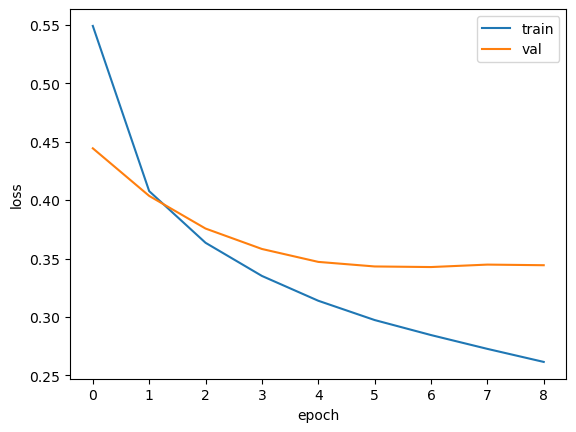

In [108]:
#훈련 손실, 검증 손실 그래프

import matplotlib.pyplot as plt

plt.plot(train_hist, label='train')
plt.plot(val_hist, label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [109]:
#torch.loadO 함수로 best_model.pt 파일에 저장한 모델 파라미터를 읽은 다음 
# load_state_dict() 메서드에 전달하여 최상의 파라미터로 mod이 객체를 업데이트
model.load_state_dict(torch.load('best_model.pt', weights_only=True))

<All keys matched successfully>

In [110]:
#검증 세트에 대한 성능을 확인
model.eval()
with torch.no_grad():
    val_scaled = val_scaled.to(device)
    val_target = val_target.to(device)
    outputs = model(val_scaled)
    predicts = torch.argmax(outputs,1)
    corrects = (predicts == val_target).sum().item()

accuracy = corrects / len(val_target)
print(f"검증 정확도: {accuracy:.4f}")

검증 정확도: 0.8781
